## Feature Reduction and Outlier Analysis
#### 1. [Installation and Importing of Libraries](#eda_import)
#### 2. [Retreival of Data and Cleanup](#eda_retrieval)
#### 3. [Further feature reduction](#featurereduction)
#### 4. [Outlier Detection](#outlier)

### <a name="eda_import"></a>Installation and Importing of Libraries
In order to both explore and visualize the data, it's necessary for us to load various libraries.  In addition to loading already pre-installed libraries, we've also had to install seaborn for plotting. 

In [18]:
##import libraries required for analysis
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest



### <a name="eda_retrieval"></a>Retreival of Data and Cleanup
We need to retrieve all the CSVs that have been cleaned by our team and then merge them together based on the ID field.  There's also some minor carpentry work we need to do before running any models

In [19]:
file_path = "/dsa/groups/casestudy2023su/team03/merged_data/mros_merged.csv"
merged_df = pd.read_csv(file_path)
merged_df.columns = merged_df.columns.str.upper()


In [20]:
merged_df.describe()

,B1TRD,B1ITD,B1FND,B1WDD,B1THD,B1L1D,B1L2D,B1L3D,B1L4D,B1TLD,...,RADIALPULSE_AVG,AVGHEIGHT_CM,BMI,HEIGHTCHANGEFROM25,WEIGHTCHANGEFROM25,FAFXN,FAFXNT,GIAGE1,FAFXN_BIN,FAFXNT_BIN
count,5993.000000,5993.000000,5993.000000,5993.000000,5993.000000,5959.000000,5970.000000,5959.000000,5928.000000,5984.000000,...,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5994.000000,5896.000000,5994.000000,5994.000000,5994.000000
mean,0.765006,1.111737,0.784188,0.549988,0.957574,0.979857,1.060341,1.098382,1.132830,1.072136,...,64.434354,174.148639,27.378324,3.705292,10.339891,0.432432,0.339722,73.657658,0.253420,0.214715
std,0.127372,0.166541,0.128120,0.143191,0.140507,0.176924,0.193398,0.207285,0.217090,0.186580,...,9.898104,6.782385,3.829940,2.960090,11.375341,1.002012,0.818213,5.872264,0.435006,0.410659
min,0.167047,0.389357,0.272729,0.011999,0.306135,0.298691,0.412878,0.382238,0.485280,0.468967,...,36.000000,147.150000,17.211000,-30.180000,-42.393700,0.000000,0.000000,64.000000,0.000000,0.000000
25%,0.677265,0.998994,0.696231,0.450630,0.862595,0.859858,0.928092,0.955143,0.983275,0.942318,...,58.000000,169.500000,24.777850,1.970000,2.994512,0.000000,0.000000,69.000000,0.000000,0.000000
50%,0.758544,1.104830,0.773551,0.533464,0.951281,0.968156,1.047115,1.081790,1.109385,1.059090,...,63.000000,174.100000,26.905750,3.590000,9.365350,0.000000,0.000000,73.000000,0.000000,0.000000
75%,0.847333,1.221530,0.860136,0.632593,1.049750,1.086570,1.176145,1.219770,1.260102,1.184975,...,70.000000,178.550000,29.490625,5.240000,17.125600,1.000000,0.000000,78.000000,1.000000,0.000000
max,1.699030,1.984450,1.598350,1.541770,1.763900,1.976850,2.256810,2.245680,2.380170,2.098860,...,198.000000,198.900000,50.668700,30.870000,69.257700,12.000000,12.000000,100.000000,1.000000,1.000000


## <a name="featurereduction"></a> Feature Reduction

#### Removal of irrelevant columns
For the columns which won't apply to our modeling, we can go ahead and remove them

### Removal of Highly Correlated Features

If two or more columns are highly correlated, you can remove one of them since they provide redundant information. Below, we're calcuating a correlation matrix and then subsequently dropping columns with a high correlation coefficient.

In this case, we're dropping any features that have a greater than **.95** correlation

In [26]:
# Calculate correlation matrix
correlation_matrix = merged_df.corr().abs()

# It's really challening to visualize this since there are so many features
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.show()

# Instead, we'll list the specific feature without the visual
threshold = 0.85
high_corr_features = np.where(correlation_matrix > threshold)
high_corr_pairs = [(merged_df.columns[x], merged_df.columns[y], correlation_matrix.iloc[x, y]) for x, y in zip(*high_corr_features) if x != y]

for pair in high_corr_pairs:
    print(pair)

('B1TRD', 'B1THD', 0.913527494652426)
('B1ITD', 'B1THD', 0.9716785854670269)
('B1FND', 'B1WDD', 0.8723333824357195)
('B1FND', 'B1THD', 0.8744983433321912)
('B1WDD', 'B1FND', 0.8723333824357195)
('B1THD', 'B1TRD', 0.913527494652426)
('B1THD', 'B1ITD', 0.9716785854670269)
('B1THD', 'B1FND', 0.8744983433321912)
('B1L1D', 'B1L2D', 0.8729281654568473)
('B1L1D', 'B1TLD', 0.8972636232333797)
('B1L2D', 'B1L1D', 0.8729281654568473)
('B1L2D', 'B1L3D', 0.8975425803797392)
('B1L2D', 'B1TLD', 0.9473722782066122)
('B1L2D', 'B1LSD', 0.87289503766249)
('B1L3D', 'B1L2D', 0.8975425803797392)
('B1L3D', 'B1L4D', 0.890635556337567)
('B1L3D', 'B1TLD', 0.9629080311406271)
('B1L3D', 'B1LSD', 0.8955995036312291)
('B1L4D', 'B1L3D', 0.890635556337567)
('B1L4D', 'B1TLD', 0.9323900172498405)
('B1L4D', 'B1LSD', 0.8572667427935557)
('B1TLD', 'B1L1D', 0.8972636232333797)
('B1TLD', 'B1L2D', 0.9473722782066122)
('B1TLD', 'B1L3D', 0.9629080311406271)
('B1TLD', 'B1L4D', 0.9323900172498405)
('B1TLD', 'B1LSD', 0.9182702211

In [27]:
# Finally - we'll actually drop the feature Drop one feature from each highly correlated pair
# We need to be certain that we're not accidentally dropping our independent variables or the same column twice
dropped_columns = []

for pair in high_corr_pairs:
    feature1 = pair[0]
    feature2 = pair[1]
    if (
        feature1 in merged_df.columns
        and feature1 not in ['FAFXN', 'FAFXNT']
        and feature2 not in ['FAFXN', 'FAFXNT']
        and feature2 not in dropped_columns
    ):
        merged_df.drop(feature2, axis=1, inplace=True)
        dropped_columns.append(feature2)

print(dropped_columns)

['B1THD', 'B1WDD', 'B1L2D', 'B1TLD', 'B1L4D', 'B1LSD', 'B1SBD', 'NPHIPSD', 'NPLEFTNO', 'NPRGTNO', 'NPREASL', 'NPREASR', 'NPREASB', 'NPSEATLT', 'NPLEFT6', 'NPLEFT4', 'NPLEFT5', 'NPLEFT3', 'NPLEFT8', 'NPLEFT2', 'NPLEFT7', 'NPLEFT9', 'NPRIGHT1', 'NPRIGHT2', 'NPLMAX', 'NPOMAX', 'NPRIGHT4', 'NPRIGHT5', 'NPRIGHT3', 'NPRIGHT8', 'NPRIGHT7', 'NPRIGHT9', 'NPRMAX', 'MHDIABT', 'MHLTHYT', 'MHPARKT', 'MHBPT', 'MHMIT', 'MHGLAUT', 'MHSTMAGE', 'MHCCAGE', 'MHSCAGE', 'MHLCAGE', 'MHPCAGE', 'MHOCAGE', 'MHDIZTIM', 'MHFALLTM', 'MHWGTKG', 'STANDINGHEIGHT_MEAS1', 'STANDINGHEIGHT_MEAS2', 'AVGHEIGHT_CM', 'WEIGHT_KG', 'ARMSTOSTANDUP?(CALCVAR)', 'TOCOMPLETE5STANDS,ARMUSE.U', 'NO.OFSTEPSFORTRIAL1USUALPACE', 'TIMETOCOMPLETETRIAL2USUALPACE', 'TIMETOWALK6M(CALCVAR)', 'TRIAL2AIDUSEDUSUALPACE', 'TOCOMPLETE6MTRIALS(CALC)', 'TRIAL2AIDUSED(NARROWWALK)', 'SPEED(M/S),BOTHTIMES,AIDS.U(CALC)', 'SPEEDINM/SUSINGBESTTIME(CALC)', 'SPEED(M/S),BESTTIME,AIDS.U(CALC)', 'TOCOMPLETE>=1NWTRIAL(CALC)', 'NWTRIALSCOMPLETEDW/OAIDS(CALC)', 'T

In [28]:
# Count the number of columns that are not independent variables
independent_vars = ['FAFXN', 'FAFXNT']
num_columns = sum(1 for col in merged_df.columns if col not in independent_vars)

print("Number of columns (excluding independent variables):", num_columns)

Number of columns (excluding independent variables): 268


### <a name="outlier"></a> Outlier Detection

We previously did some univariate outlier detection but found that the values all fell into a possible range. Below we also use an isolation forest model to do multivariate outlier detection.

In [29]:
X = pd.get_dummies(merged_df.drop(['FAFXN', 'FAFXNT', 'FAFXN_BIN', 'FAFXNT_BIN'], axis=1)) 
y = merged_df['FAFXNT_BIN'].astype(int)


In [30]:
# Initiate the IsolationForest model
iso_forest = IsolationForest(contamination=0.05)  # the proportion of outliers in the data set

# Fit 
iso_forest.fit(X)

# Predict the outliers
outliers = iso_forest.predict(X)  # for each record, returns 1 if inlier and -1 if outlier

# Count the number of outliers and inliers
num_outliers = (outliers == -1).sum()
num_inliers = (outliers == 1).sum()

print(f"Number of outliers: {num_outliers}")
print(f"Number of inliers: {num_inliers}")



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Number of outliers: 300
Number of inliers: 5694


In [31]:
# Add the outlier column to dataframe
merged_df['outlier'] = outliers

# Create a DataFrame of only the outliers
outlier_df = merged_df[merged_df['outlier'] == -1]
inlier_df = merged_df[merged_df['outlier'] == 1]

# Examine the outlier DataFrame
print(outlier_df.head())
print(outlier_df.describe())

       B1TRD    B1ITD     B1FND     B1L1D     B1L3D    B1TBD    B1HDD  \
25  0.639688  0.85826  0.665233  0.777913  0.877683  1.03204  1.64470   
33  0.721903  1.09745  0.835498  0.993694  0.965303  1.09762  1.47005   
35  0.856298  1.10650  0.779001  1.237560  1.024970  1.16024  1.94696   
45  0.643421  1.07523  0.780712  0.771290  0.868038  1.16887  2.31227   
79  0.858549  1.32968  0.978358  1.470280  1.487880  1.66587  2.48765   

       B1LAD     B1RAD     B1LRD  ...  HEIGHTCHANGEFROM25  WEIGHTCHANGEFROM25  \
25  0.815629  0.816695  0.580695  ...                5.27            13.12610   
33  0.932198  0.986655  0.721947  ...                6.77            13.88970   
35  0.945873  0.946742  0.723941  ...                4.17             2.49355   
45  0.843689  0.850942  0.745092  ...                2.77            38.72560   
79  1.030930  1.076630  0.864999  ...               11.45            12.81790   

    FAFXN  FAFXNT              GIEDUC   GIERACE  GIAGE1  FAFXN_BIN  \
25  

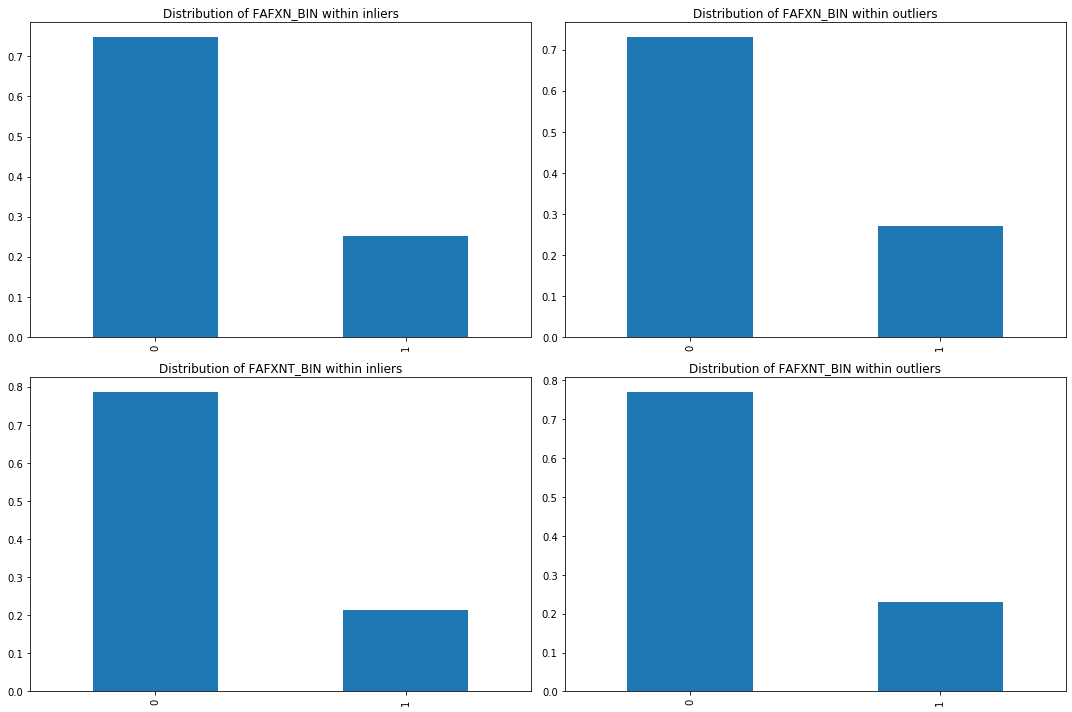

In [32]:
# Setup matplotlib subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot for FAFXN_BIN
inlier_df['FAFXN_BIN'].value_counts(normalize=True).plot(kind='bar', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of FAFXN_BIN within inliers')

outlier_df['FAFXN_BIN'].value_counts(normalize=True).plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('Distribution of FAFXN_BIN within outliers')

# Plot for FAFXNT_BIN
inlier_df['FAFXNT_BIN'].value_counts(normalize=True).plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Distribution of FAFXNT_BIN within inliers')

outlier_df['FAFXNT_BIN'].value_counts(normalize=True).plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Distribution of FAFXNT_BIN within outliers')

plt.tight_layout()
plt.show()


In [33]:
print("Distribution of FAFXN_BIN within outliers:")
print(outlier_df['FAFXN_BIN'].value_counts(normalize=True))

print("Distribution of FAFXNT_BIN within outliers:")
print(outlier_df['FAFXNT_BIN'].value_counts(normalize=True))

print("Distribution of FAFXN_BIN within inliers:")
print(inlier_df['FAFXN_BIN'].value_counts(normalize=True))

print("Distribution of FAFXNT_BIN within inliers:")
print(inlier_df['FAFXNT_BIN'].value_counts(normalize=True))

Distribution of FAFXN_BIN within outliers:
0    0.73
1    0.27
Name: FAFXN_BIN, dtype: float64
Distribution of FAFXNT_BIN within outliers:
0    0.77
1    0.23
Name: FAFXNT_BIN, dtype: float64
Distribution of FAFXN_BIN within inliers:
0    0.747453
1    0.252547
Name: FAFXN_BIN, dtype: float64
Distribution of FAFXNT_BIN within inliers:
0    0.786091
1    0.213909
Name: FAFXNT_BIN, dtype: float64


### We previously believed the univariate outliers in our dataset to be medically significant -- that unusual data points were possible and potentially significant in regards to fracture risk. Given our domain, and the small difference between inliers and outliers in regards to fracture outcome, we plan to retain our outliers for now. We also plan to use tree based and gradient boosting machine learning models, which are less affected by outliers.

In [34]:
# Set output file path of the newly cleaned file with outlier retained
output_file_path = "/dsa/groups/casestudy2023su/team03/merged_data/mros_merged_clean.csv"

# Export dataframe to CSV
merged_df.to_csv(output_file_path, index=False)
